In [1]:
%%capture

# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Important header information
naluhelperdir = '../utilities'
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, naluhelperdir)

%matplotlib inline

In [2]:
rundict = [
    # Dir,                          prefix,     lcolor
    ['NaluWind_newBC.refT' ,       'NaluWind',  'b'],
#    ['amrwind_run01' ,   'amrwind',   'r'],
    ['amrwind_run01.refT' ,        'amrwind',   'r'],
    ['amrwind_run01.refTnolim' ,   'amrwind',   'pink'],
    ]

In [3]:
# DanAero Data
# See /ascldap/users/lcheung/GPFS1/2020/IEATask29/Field measurements Tjaereborg/Calibrated data/InflowLoadsAerodynamicsMeasurements_35Hz/PythonAnalysis/avgcolsWS.dat
# Run 16-07-2009/Tjaereborg_20090716_1250_000035.tim
DanAeroZ  = [17,        28.5,      41,        57,        77,        90]
DanAeroWS = [5.884,     5.973,     5.931,     6.128,     6.028,     6.088]

# Hub-height locations
plotheights=[57.19]

## Velocity Profiles

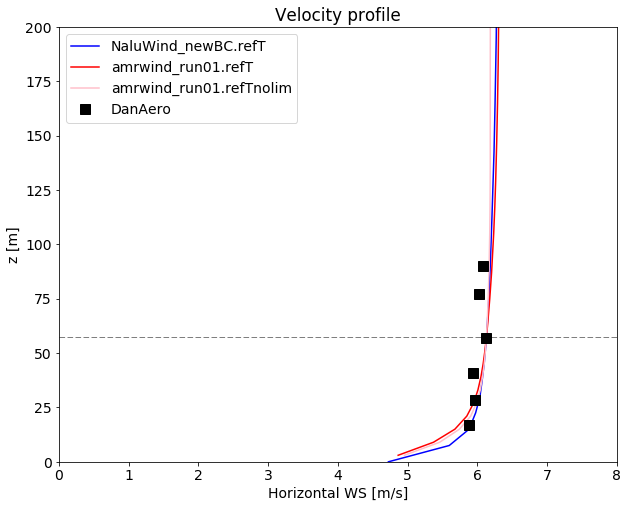

In [4]:
# Plot velocity
plt.figure(figsize=(10,8));
plt.rc('font', size=14)

for run in rundict:
    filename = run[0]+'/'+run[1]+'_velocity.dat'
    vdat     = np.loadtxt(filename)
    Uhoriz   = np.sqrt(vdat[:,1]**2 + vdat[:,2]**2)
    plt.plot(Uhoriz, vdat[:,0], color=run[2], label=run[0])
    
# Plot hub-heights
for hh in plotheights: plt.hlines(hh, 0, 30, linestyles='dashed', linewidth=0.5)

# Plot DanAero Data
plt.plot(DanAeroWS, DanAeroZ, 's', color='k',markersize=10, label='DanAero')
    
plt.ylim([0,200])
plt.xlim([0,8])
plt.ylabel('z [m]')
plt.xlabel('Horizontal WS [m/s]')
plt.legend()
plt.title('Velocity profile')

## Temperature profiles

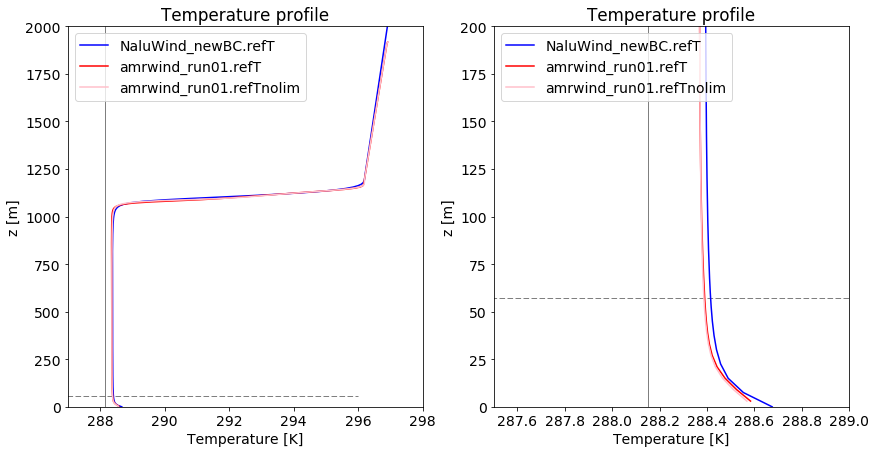

In [5]:
# Plot temperature
#plt.figure(figsize=(10,8));
fig, axs = plt.subplots(1,2,figsize=(14,7),sharey=False);
plt.rc('font', size=14)

for run in rundict:
    filename = run[0]+'/'+run[1]+'_temperature.dat'
    Tdat     = np.loadtxt(filename)
    for i in [0,1]: axs[i].plot(Tdat[:,1], Tdat[:,0], color=run[2], label=run[0])

# Plot hub-heights
for hh in plotheights: 
    for i in [0,1]: axs[i].hlines(hh, 286, 296, linestyles='dashed', linewidth=0.5)

for i in [0,1]:
    axs[i].vlines(288.15, 0,2000, linewidth=0.5)
    axs[i].set_xlabel('Temperature [K]')
    axs[i].set_ylabel('z [m]')
    axs[i].legend(loc='upper left')
    axs[i].set_title('Temperature profile')
axs[0].set_xlim([287,298])
axs[1].set_xlim([287.5,289])

axs[0].set_ylim([0,2000])
axs[1].set_ylim([0,200]);
#plt.ylim([0,100])
#plt.xlim([288,288.2])


## Veer profiles

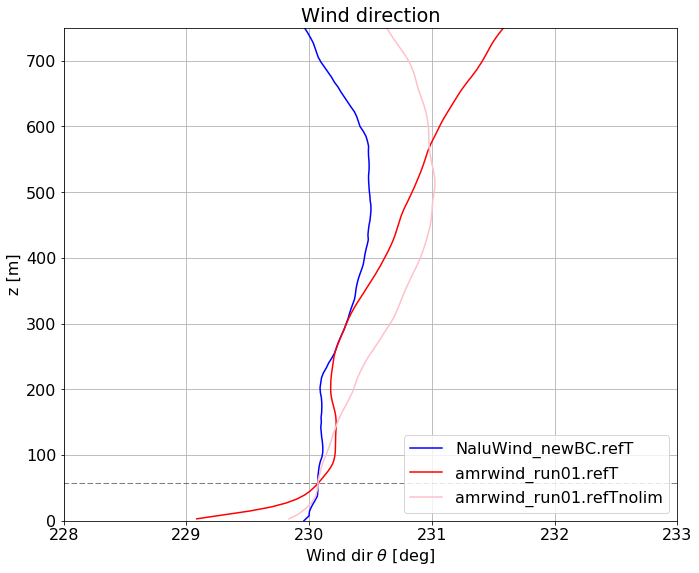

In [6]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)
veer = lambda u, v: 270-np.arctan2(v, u)*180.0/np.pi

for run in rundict:
    filename = run[0]+'/'+run[1]+'_velocity.dat'
    vdat     = np.loadtxt(filename)
    V         = veer(vdat[:,1], vdat[:,2])
    plt.plot(V, vdat[:,0], color=run[2], label=run[0])
    
# Plot hub-heights
for hh in plotheights: plt.hlines(hh, 0, 360, linestyles='dashed', linewidth=0.5)   
    
plt.xlabel(r'Wind dir $\theta$ [deg]')
plt.ylabel('z [m]')
plt.legend(loc=0)
plt.ylim(0,750)
plt.xlim(228,233)
plt.grid()
plt.tight_layout()
plt.title('Wind direction')

## Reynolds stresses

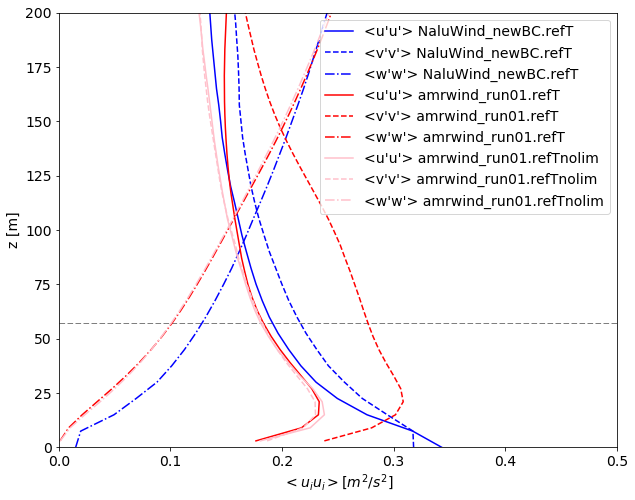

In [7]:
# Plot Reynolds stresses
plt.figure(figsize=(10,8));
plt.rc('font', size=14)

for run in rundict:
    filename = run[0]+'/'+run[1]+'_reynoldsstresses.dat'
    REdat     = np.loadtxt(filename)
    plt.plot(REdat[:,1], REdat[:,0], color=run[2], linestyle='-',  label="<u\'u\'> "+run[0])
    plt.plot(REdat[:,4], REdat[:,0], color=run[2], linestyle='--', label="<v\'v\'> "+run[0])
    plt.plot(REdat[:,6], REdat[:,0], color=run[2], linestyle='-.', label="<w\'w\'> "+run[0])
    
# Plot hub-heights
for hh in plotheights: plt.hlines(hh, 0, 30, linestyles='dashed', linewidth=0.5)

# Plot DanAero Data
#plt.plot(DanAeroWS, DanAeroZ, 's', color='k',markersize=10, label='DanAero')
    
plt.ylim([0,200])
plt.xlim([0,0.5])
plt.ylabel('z [m]')
plt.xlabel(r'$<u_i u_i> [m^2/s^2]$')
plt.legend()